In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
from sklearn import datasets, linear_model
import datetime
import time

import warnings
warnings.filterwarnings(action='ignore')

## Path

In [2]:
import os

Get the directory of executable

In [3]:
os.getcwd()

'C:\\Users\\aagri\\Documents\\Python Scripts\\PERCCOM Energy Data\\Data CRESCO 6'

Get subdirectory

In [5]:
os.path.join( os.getcwd(), 'Analysis' )
# Output_dir = os.path.join(Working_dir, 'Analysis')

'C:\\Users\\aagri\\Documents\\Python Scripts\\PERCCOM Energy Data\\Data CRESCO 6\\Analysis'

Rename files

In [ ]:
src = 'old.csv'
dst = 'new.csv'
os.rename(os.path.join( Directory, src ), os.path.join( Directory, dst ))

## Files

### Files read

csv

In [ ]:
node_df = pd.read_csv( os.path.join( Directory, Filename ), delimiter=";", header=0 )#index_col=0

excel

In [ ]:
df = pd.read_excel( os.path.join( Directory, Filename ) )

### Files write

In [ ]:
import pandas as pd
excel_writer = pd.ExcelWriter( os.path.join( Directory, "Filename.xlsx" ))
df.to_excel( excel_writer )
excel_writer.save()

In [ ]:
df.to_csv( path_or_buf=os.path.join( Directory, Filename ), sep=';', index=False )

In [ ]:
with open( os.path.join( Directory, Filename ), 'w' ) as f:
    f.write( str('Content') )

#### Excel writer to separate sheets

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter( os.path.join( Output_dir, 'nodes_energy_summary_dict.xlsx'), engine='xlsxwriter')

# Write each dataframe to a different worksheet.
for df_name in nodes_df_names:
    nodes_energy_summary_dict[df_name].to_excel(writer, sheet_name=df_name)#, header=False

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## Timestamp

In [ ]:
import datetime
node_df["timestamp_py"] = node_df["timestamp_measure"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

String to datetime

In [7]:
import datetime
datetime.datetime.strptime('Tue  4 Sep 11:49:25 CEST 2018', '%a %d %b %H:%M:%S CEST %Y')

datetime.datetime(2018, 9, 4, 11, 49, 25)

Field of the datetime

In [8]:
datetime.datetime.strptime('Tue  4 Sep 11:49:25 CEST 2018', '%a %d %b %H:%M:%S CEST %Y').year
#year, month, day, hour, month, second, time(), date()

2018

#### Unique elements of list
initial list $\rightarrow$ set with unique values $\rightarrow$ reformat the set to list

In [ ]:
list(set(dcenergy_all_error_nodes))

## DataFrame

- Axis 0 will act on all the ROWS in each COLUMN
- Axis 1 will act on all the COLUMNS in each ROW

In [14]:
import pandas as pd
df = pd.DataFrame(columns=['col1', 'col2'], index=range(3), data=0)
df

,col1,col2
0,0,0
1,0,0
2,0,0


Filter inside the column

In [ ]:
df.col_name.loc[df.colname==value].unique()
# For logical connectors use
# & | ()

Index of columns with a condition True at least for one row of the column

In [ ]:
np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :] > 5.)[0]

Get rows of the column 'colname' which are equal to the 'value' 

In [ ]:
df[df.colname == value]

Drop columns

In [ ]:
to_drop = df.iloc[:,to_drop_ix].columns.values
df.drop(columns=to_drop, inplace=True)

Replace inf, nan with zero

In [ ]:
df.replace([np.inf, -np.inf, np.nan],0)

Display columns with NaN

In [ ]:
df.loc[:, df.isna().any()]

Display columns with inf

In [ ]:
df.columns.to_series()[np.isinf(df).any()]

Extract rows by regex match

In [ ]:
df.loc[df.index.str.contains(r'temp$', regex=True),:]

## Lambda

In [16]:
lambda s: int(s) if s.isdigit() else 0

<function __main__.<lambda>>

## Apply for every element of a list

In [ ]:
list_2 = [item.split('.')[0] for item in list_1]

## Numpy

Append two arrays and keep unique values

In [ ]:
np.unique(np.append(\
             np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :].isna())[0], \
             np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :] > 5.)[0]))

Two arrays are equal element-wise

In [ ]:
np.array_equal(df_column_1.values, df_column_2.values)

Drop zeros

In [ ]:
x[np.nonzero(x)]

# Datetime

In [ ]:
datetime.datetime(year, month, day)

## Plots

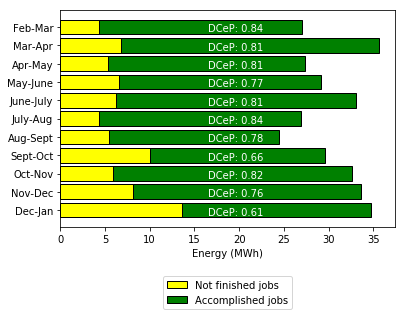

In [4]:
summary = pd.read_excel( os.path.join( "C:\\Users\\aagri\\Documents\\Python Scripts\\PERCCOM Energy Data\\Data v.3", "energy_summary.xlsx" ) )
s=summary[['en_exit_jobs_kWh','en_done_jobs_kWh']].copy()
# s=summary[['en_exit_only_jobs_kWh','en_done_only_jobs_kWh']].copy()

s = s/1000

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.barh(ind, s.en_exit_jobs_kWh, color='white', edgecolor='black', hatch='xx')
# p2 = plt.barh( ind, s.en_done_jobs_kWh, color='white', edgecolor='black', left = s.en_exit_jobs_kWh )

p1 = plt.barh(ind, s.iloc[:,0], color='yellow', edgecolor='black')
p2 = plt.barh( ind, s.iloc[:,1], color='green', edgecolor='black', left = s.iloc[:,0] )
#en_done_jobs_kWh

plt.xlabel('Energy (MWh)')
plt.yticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'))


for i,j in zip(ind, s.iloc[:,0]):#s.en_exit_jobs_kWh
    ax.annotate('DCeP: %.2f'%round(summary.DCeP.iloc[i],2),
                xy=((s.iloc[:, 0].max())+3, i+0.25), size=10, color='white')
ax.invert_yaxis()
lgd = plt.legend((p1[0], p2[0]), ('Not finished jobs', 'Accomplished jobs'),\
             loc='upper center', bbox_to_anchor=(0.5, -0.2))
# fig.savefig(os.path.join(Working_dir, 'energy_cons_ex_done_no_title.png'),\
#             bbox_extra_artists=(lgd,), bbox_inches='tight', \
#             dpi=1200)
plt.show()

### Erase xticks and shift label

In [ ]:
plt.xlabel('Nodes')
plt.xticks(visible=False)
plt.gca().xaxis.set_label_coords(0.5, -0.05) 

### Barplot

In [ ]:
# Title for each bar
temp_titles = ['Exhaust', 'Inlet', 'CPU 1', 'CPU 2']

# Colours
temp_colors = ['darkred', 'royalblue', 'goldenrod', 'peru']

# Bars horizontal positions
x_pos = np.arange(len(data))

# Height of bars
data = nodes_summary_no_drop_df.filter(regex=(r'temp$'), axis=0).iloc[:,-1].values

# Sort lists by values of the first one
data, temp_titles, temp_colors = zip(*sorted(zip(data, temp_titles, temp_colors)))

# Plot and add bar titles
plt.bar(x_pos, data, color=temp_colors, width=0.5)
plt.xticks(x_pos, temp_titles)

# Decoration
plt.ylabel('Temperature (℃)')
plt.xlabel('Measurement')
plt.title('Average temperature levels')

# Save, then show
fig.savefig( os.path.join( Plots_dir, 'Temp_levels_global_avg_v2.png'),dpi=900 )
plt.show()

### Colours
https://matplotlib.org/examples/color/named_colors.html

# Regex

https://www.datacamp.com/community/tutorials/python-regular-expression-tutorial

r before a string - raw string literal. It changes how the string literal is interpreted. Such literals are stored as they appear.

```python
.``` - A period. Matches any single character except newline character.


In [7]:
import re
pattern = r"Cookie"
sequence = "Cookie"
print(re.match(pattern, sequence))
if re.match(pattern, sequence):
    print("Match!")
else: 
    print("Not a match!")

<_sre.SRE_Match object; span=(0, 6), match='Cookie'>
Match!


The group() function returns the string matched by the re.

In [ ]:
re.search(r'Co.k.e', 'Cookie').group()

# Pandas Series

Drop zero values

In [ ]:
data[data != 0.]

# Functions pass by reference

```
def foo(x):
    x = 'another value'
    print x

bar = 'some value'
foo(bar)
```
Here's where the difference lies. In the line:

```
x = 'another value'
```
you're not actually altering the contents of x. In fact, that's not even possible. Instead, you're creating a new string object with value 'another value'. 

In [10]:
def foo(x):
    x = 'another value'
    print(x)

bar = 'some value'
foo(bar)
print(bar)

another value
some value
